# First Panda Project - cleaning datasets

### Importing


In [1]:
# Importing libraries
from importlib import reload  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
import sys
sys.path.append("src/")  # path contains python_file.py
import clean_functions as cf

# Importing data 
# * because an error we should use encoding='latin-1'

df = pd.read_csv('../../../data/attacks.csv', encoding='latin-1')
print(df.shape)
df.head()

(25723, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN



### Reflexions and raw data description
- The last two columns are probably empty
- The information of the following columns is problably not relevant at all:
    - original order
    - href
    - href formula
    - pdf
    - Investigator or Source
    - Name
    - Case Number 	
- Meanwhile the others columns looks important:
    - Date
    - Year
    - Type
    - Country
    - Area 	
    - Location
    - Activity 	
    - Sex (of the shark)
    - Species
    
#### --> First hipothesis
    The sharks attack depend on the season
    
    


# Cleaning

##### Data description

- Analizing the columns: original order, href, href formula ,pdf, Investigator or Source, Name

In [2]:
df["original order"].describe()

count    6309.000000
mean     3155.999683
std      1821.396206
min         2.000000
25%      1579.000000
50%      3156.000000
75%      4733.000000
max      6310.000000
Name: original order, dtype: float64

#### Reflexion
It seems to be an index to register the attacks, so the information of consecutive if it was a time trend will be in the dates

In [3]:
df["href"].value_counts()

http://sharkattackfile.net/spreadsheets/pdf_directory/w014.01.25-Grant.pdf             4
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.02.b-Vandenberg.pdf      3
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.14-Bandy.pdf             2
http://sharkattackfile.net/spreadsheets/pdf_directory/1923.00.00.a-NJ fisherman.pdf    2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf        2
                                                                                      ..
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.07.02-Comoros.pdf           1
http://sharkattackfile.net/spreadsheets/pdf_directory/1963.12.20.b-Coetzee.pdf         1
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.07.02-Matt-Lee.pdf          1
http://sharkattackfile.net/spreadsheets/pdf_directory/2002.12.01-Gadelha.pdf           1
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.09.24-Kenney.pdf            1
Name: href, Length: 6

#### Reflexion
It seems as a link to the pdf register of the attack, there are 4 register in one file, perhaps it could be repeated registers with the same information... let us check

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722    False
Length: 25723, dtype: bool

In [5]:
df["href formula"].value_counts()

http://sharkattackfile.net/spreadsheets/pdf_directory/1898.00.00.R-Syria.pdf                 2
http://sharkattackfile.net/spreadsheets/pdf_directory/1923.00.00.a-NJ fisherman.pdf          2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.07.12.a-b-Stillwell-Fisher.pdf    2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf              2
http://sharkattackfile.net/spreadsheets/pdf_directory/1929.03.04.a-b.Roads-Aldridge.pdf      2
                                                                                            ..
http://sharkattackfile.net/spreadsheets/pdf_directory/1890.00.00.a-ZuluMale.pdf              1
http://sharkattackfile.net/spreadsheets/pdf_directory/1907.10.12-alleghany-sailor.pdf        1
http://sharkattackfile.net/spreadsheets/pdf_directory/1929.11.21-Yugoago.pdf                 1
http://sharkattackfile.net/spreadsheets/pdf_directory/1554.00.00-Rondelet.pdf                1
http://sharkattackfile.net/spreadsheets/pdf_direct

In [6]:
df["pdf"].value_counts()

1916.07.12.a-b-Stillwell-Fisher.pdf    2
1935.06.05.R-SolomonIslands.pdf        2
1906.09.27.R.a&b-Munich-Swede.pdf      2
1923.00.00.a-NJ fisherman.pdf          2
1929.03.04.a-b.Roads-Aldridge.pdf      2
                                      ..
1961.04.08-DaraDisaster.pdf            1
1842.00.00.a-1st-SydneyHarbour.pdf     1
2008.08.27-Zgura.pdf                   1
1912.02.22-Swanson.pdf                 1
1946.01.17-Vaughan.pdf                 1
Name: pdf, Length: 6291, dtype: int64

In [7]:
df["Investigator or Source"].value_counts()

C. Moore, GSAF                                                                                                           105
C. Creswell, GSAF                                                                                                         92
S. Petersohn, GSAF                                                                                                        82
R. Collier                                                                                                                55
R. Collier, GSAF                                                                                                          48
                                                                                                                        ... 
Sun Star, 11/08/2008                                                                                                       1
Western Argus, 9/26/1922                                                                                                   1


In [8]:
df["Name"].value_counts()

male                                      550
female                                     97
boy                                        23
2 males                                    16
boat                                       14
                                         ... 
Captain Angus Brown, his son & brother      1
Richard Kirby                               1
Bjørn Jensen                                1
Lyle Davis                                  1
L.B.                                        1
Name: Name, Length: 5230, dtype: int64

In [9]:
# Drop the columns Name,Investigator or Source,pdf, href formula, href,original order 
columns_drop=['Name','Investigator or Source','pdf', 'href formula', 'href','original order']
df=df.drop(columns_drop,axis=1)


- The last two columns are probably empty

In [10]:
print(df["Unnamed: 22"].value_counts())
print(df["Unnamed: 23"].value_counts())

stopped here    1
Name: Unnamed: 22, dtype: int64
change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64


- Yes, there are eampty. Dropping the last two columns

In [11]:
df=df.drop(["Unnamed: 22", "Unnamed: 23"],axis=1)

In [12]:
# Some columns were missing from the first head
print(df.columns)
# the columns that were missing.
df[['Age', 'Injury', 'Fatal (Y/N)', 'Time']].head()

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Case Number.1', 'Case Number.2'],
      dtype='object')


,Age,Injury,Fatal (Y/N),Time
0,57,"No injury to occupant, outrigger canoe and pad...",N,18h00
1,11,Minor injury to left thigh,N,14h00 -15h00
2,48,Injury to left lower leg from surfboard skeg,N,07h45
3,NaN,Minor injury to lower leg,N,NaN
4,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN


In [13]:
# Total number of null value by columns
df.isna().sum()

Case Number      17021
Date             19421
Year             19423
Type             19425
Country          19471
Area             19876
Location         19961
Activity         19965
Sex              19986
Age              22252
Injury           19449
Fatal (Y/N)      19960
Time             22775
Species          22259
Case Number.1    19421
Case Number.2    19421
dtype: int64

In [14]:
# Count the null values by row (it takes timeeee)

Null_col=df.isna()
null_total=[]
for i in range(Null_col.shape[0]):
    null_total.append(Null_col.loc[i].sum()) 

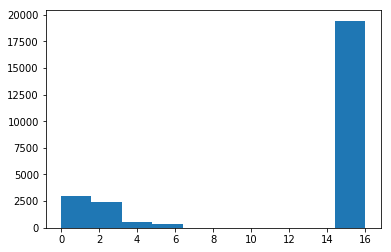

In [15]:
# Display the quantities by number of null in row.
plt.hist(null_total)
hist_null=np.histogram(null_total, bins=16)

In [16]:
# there are 19414 rows with null values in all 22 cells, and 7 rows with 21.

hist_null

(array([ 1425,  1518,  1217,  1221,   570,   269,    64,    17,     1,
            0,     0,     0,     0,     0,     0, 19421]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]))

In [17]:
# Drop the rows with 22 and 21 null values in all cells

df_null=pd.DataFrame(null_total,index=range(len(null_total)), columns=['n_nulls'])
index_null16 = np.where(df_null.n_nulls==16)
index_null16_l = list(index_null16[0])
df=df.drop(index_null16_l)
print(f'the new size of df: {df.shape}  after drop {len(index_null16_l)}')
index_null15 = np.where(df_null.n_nulls==15)
index_null15_l = list(index_null15[0])
df=df.drop(index_null15_l)
print(f'the new size of df: {df.shape}  after drop {len(index_null15_l)}')


the new size of df: (8703, 16)  after drop 17020
the new size of df: (6302, 16)  after drop 2401


In [18]:
# Count the null values by row (it takes timeeee)
Null_col_1=df.isna()
null_total_1=[]
for i in range(Null_col_1.shape[0]):
    null_total_1.append(Null_col_1.loc[i].sum()) 
    

(array([1425, 1518, 1217, 1221,  570,  269,   64,   18]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

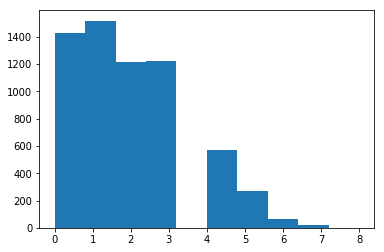

In [19]:
# new histogram (Nulls by Rows)
plt.hist(null_total_1)
hist_null_1=np.histogram(null_total_1, bins=range(max(null_total_1)+1))
hist_null_1

In [20]:
# Nulls by colums
df.isna().sum()

Case Number         1
Date                0
Year                2
Type                4
Country            50
Area              455
Location          540
Activity          544
Sex               565
Age              2831
Injury             28
Fatal (Y/N)       539
Time             3354
Species          2838
Case Number.1       0
Case Number.2       0
dtype: int64

In [21]:
df.drop_duplicates()
print(f'--->  Las dimesiones de df son:{df.shape}')

--->  Las dimesiones de df son:(6302, 16)


In [22]:
# Row without nulls 
print(f'Row without nulls:{sum(df.isnull().sum(axis=1)==0)}')
row_with_any_null=list(df[df.isnull().sum(axis=1)>0].index)
df=df.drop(row_with_any_null)

print(f'--->  Size of df after drop nulls:{df.shape}')

Row without nulls:1425
--->  Size of df after drop nulls:(1425, 16)


# Cleanning column "TIME"

In [23]:
df_Time=pd.DataFrame(df.Time)
print(f'--->  Las dimesiones de df_Time son:{df_Time.shape}')
df.Time.value_counts()

--->  Las dimesiones de df_Time son:(1425, 1)


11h00                     64
Afternoon                 61
16h00                     50
15h00                     49
12h00                     49
                          ..
11h06                      1
Shortly before 12h00       1
2 hours after Opperman     1
"After dark"               1
8:04 pm                    1
Name: Time, Length: 240, dtype: int64

### Numbers filtering

In [24]:
# Filter values in Time column and apply a filter to find the hours

#Search by hours's definition
hay_digitos=re.compile(r'\d{2}'+re.escape('h'))

df_Time=df_Time.applymap(lambda x :hay_digitos.findall(str(x)))

In [25]:
# Calculate an hour for some cells that have many values   
df_Time['time_num'] = df_Time[['Time']].apply(lambda row: cf.promedio_hora(row['Time']), axis=1)

In [26]:
# Filter by numeric values
df_Time_num=df_Time[df_Time['time_num']>=0]

# Index with number in Time
indices_con_num=list(df_Time_num.index)

# First group of hours with numeric value
print(f'--->  The dimensions of df_Time are:{df_Time.shape}')
print(f'--->  Of which are numeric:{df_Time_num.shape}')

df_Time_num

--->  The dimensions of df_Time are:(1425, 2)
--->  Of which are numeric:(1226, 2)


,Time,time_num
0,[18h],18
8,[17h],17
13,[08h],8
18,[10h],10
21,[09h],9
...,...,...
5311,[17h],17
5375,[15h],15
5484,[12h],12
5545,[14h],14


### Text filtering

In [27]:
#Filtra los valores de la columna Time y aplica un filtro para encontrar los valores de la columna
df_Time=pd.DataFrame(df.Time)

# Filtra los que no son dígitos
no_hay_digitos=re.compile(r'[\D]')
df_Time['time_str_fil']=df_Time.applymap(lambda x :no_hay_digitos.findall(str(x)))

# Convierte la lista de cada celda creada en cadena de carácteres
df_Time['time_str']=df_Time.time_str_fil.apply(lambda x : ''.join(x))

# Borra las celdas que tienen ya una hora asignada
df_Time=df_Time.drop(indices_con_num)

# Borra las celdas no nan
indices_con_null=list(df_Time.time_str[df_Time.time_str=='nan'].index)
df_Time=df_Time.drop(indices_con_null)

print(f'--->  Las dimesiones de df_Time son:{df.Time.shape}')
print(f'--->  De estos se tratarán como texto:{df_Time.shape}')
print(f'--->  Y se han eliminado {len(indices_con_null)} nulos.')

df_Time.time_str.value_counts()

--->  Las dimesiones de df_Time son:(1425,)
--->  De estos se tratarán como texto:(199, 3)
--->  Y se han eliminado 0 nulos.


Afternoon                 61
Morning                   48
Late afternoon            17
Night                     14
Evening                    7
Early afternoon            5
Midday                     5
Dusk                       5
A.M.                       4
                           3
Early morning              3
--                         3
j                          2
                           2
P.M.                       2
"Evening"                  1
Sunset                     1
After noon                 1
Daytime                    1
Morning                    1
Just before sundown        1
X                          1
 hours after Opperman      1
"After dark"               1
Early Morning              1
                           1
After dusk                 1
Shortly after midnight     1
Late morning               1
Mid-morning                1
"Night"                    1
: pm                       1
h                          1
Name: time_str, dtype: int64

In [28]:
# Categorizando los textos --> Morning

contiene_morning=re.compile(r'(orning)')
df_Time['morning']=df_Time[['time_str']].apply(lambda x: contiene_morning.findall(str(x)),axis=1)

index_morning=list(df_Time.morning[df_Time.morning.apply(len)>0].index)
df_Time.morning.loc[index_morning]='Morning'
df_Time.Time.loc[index_morning]='Morning'

print(f'--->  Dimensiones de df_Time:{df_Time.shape} de estos son {len(index_morning)} morning')

--->  Dimensiones de df_Time:(199, 4) de estos son 55 morning


In [29]:
# Categorizando los textos --> Afternoon

contiene_aftern=re.compile(r'(fterno)|(Sunset)|(After noon)')
df_Time['after']=df_Time[['time_str']].apply(lambda x: contiene_aftern.findall(str(x)),axis=1)

index_aftern=list(df_Time.after[df_Time.after.apply(len)>0].index)
df_Time.after.loc[index_aftern]='Afternoon'
df_Time.Time.loc[index_aftern]='Afternoon'

print(f'--->  Dimensiones de df_Time:{df_Time.shape} de estos son {len(index_aftern)} afternoon')

--->  Dimensiones de df_Time:(199, 5) de estos son 85 afternoon


In [30]:
# Categorizando los textos --> night evening Dusk ..etc

contiene_night=re.compile(r'(igh)|(vening)|(usk)|(Before daybreak)|(Dark)|(Just before dawn)')
df_Time['night']=df_Time[['time_str']].apply(lambda x: contiene_night.findall(str(x)),axis=1)

index_night=list(df_Time.night[df_Time.night.apply(len)>0].index)
df_Time.night.loc[index_night]='Night'
df_Time.Time.loc[index_night]='Night'

print(f'--->  Dimensiones de df_Time:{df_Time.shape} de estos son {len(index_night)} night')

--->  Dimensiones de df_Time:(199, 6) de estos son 30 night


In [31]:
# Categorizando los textos --> los restos /// completarian el resto de df_Time como texto
temp=df_Time[df_Time.morning==df_Time.after]
df_Time['resto']=temp[temp.night.apply(len)==0].Time
print(f'--->  Dimensiones de df_Time:{df_Time.shape} de estos son {df_Time.shape[0]-df_Time.resto.isnull().sum()} resto')
df_Time.resto.value_counts()

--->  Dimensiones de df_Time:(199, 7) de estos son 29 resto


Midday                    5
A.M.                      4
--                        3
                          2
P.M.                      2
15j45                     1
Daytime                   1
"After dark"              1
1600                      1
Just before sundown       1
                          1
9h00                      1
06j00                     1
0830                      1
2 hours after Opperman    1
1500                      1
8:04 pm                   1
X                         1
Name: resto, dtype: int64

In [32]:
# extre algunas hora 
import clean_functions as cf
Hora_con_ceros=re.compile(r'\d{2}00\s|\d:\d:w{2}|\d+h')
df_Time['resto_hora']=df_Time[['resto']].apply(lambda x: Hora_con_ceros.findall(str(x)),axis=1)
df_Time['resto_hora']=df_Time['resto_hora'].apply(cf.limpia_comillas_corchetes)

In [33]:
# convierte las cadenas a horas
df_Time['resto_hora']=df_Time['resto_hora'].apply(cf.f_hora_con_ceros)

In [34]:
# asignando horas según valor
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='0830'].index)]=8
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Midday'].index)]=12
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Midday.'].index)]=12
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Just before noon'].index)]=12
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Dawn'].index)]=6
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Daybreak'].index)]=6
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Lunchtime'].index)]=12
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Noon'].index)]=12
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='2 hrs before sunset'].index)]=17
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='Just before sundown'].index)]=19
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='"After lunch"'].index)]=14
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='"After dark"'].index)]=21
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='06j00'].index)]=6
df_Time.resto_hora.loc[list(df_Time[df_Time.Time=='15j45'].index)]=16


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
#crea definitivo
df_Time['Time_def'] = None
df_Time['Time_def'] = np.where(~df_Time.resto_hora.isnull(),df_Time.resto_hora,df_Time.Time_def)
df_Time['Time_def'].loc[index_morning]='Morning'
df_Time['Time_def'].loc[index_aftern]='Afternoon'
df_Time['Time_def'].loc[index_night]='Night'
print(f'Al final quedaron {df_Time.Time_def.isnull().sum()} nulos de los 583')
df_Time['Time_def'].value_counts()


Al final quedaron 16 nulos de los 583


Afternoon    85
Morning      55
Night        30
12.0          5
16.0          2
21.0          1
19.0          1
9.0           1
8.0           1
6.0           1
15.0          1
Name: Time_def, dtype: int64

### Update the main DataFrame

In [36]:
# Actualizar la base definitiva
df.Time.loc[list(df_Time['Time_def'].index)]=df_Time['Time_def']
df.Time.loc[list(df_Time_num['time_num'].index)]=df_Time_num['time_num']

In [37]:
# crea variable Momento del Día
import clean_functions as cf 
df['moment_day']=None
df.moment_day=df.Time.apply(cf.moment_day)

# Cleaning columns -- "Fatal (Y/N)"

In [38]:
# General data 
print(df['Fatal (Y/N)'].value_counts())
print(f"numero total de filas --> {df.shape}")
print(f"numero total de filas Null --> { df[df['Fatal (Y/N)'].isnull()].shape }")
     
      
df['Fatal_b']=df['Fatal (Y/N)'].apply(lambda x :cf.fatal_clasification(x))

N       1189
Y        232
 N         2
2017       1
M          1
Name: Fatal (Y/N), dtype: int64
numero total de filas --> (1425, 17)
numero total de filas Null --> (0, 17)


In [39]:
df['Fatal_b'].value_counts()

False    1191
True      232
Name: Fatal_b, dtype: int64

# Cleaning columns -- "Species"

In [40]:
# let us begin with the name of column
df['Species']=df['Species ']
df=df.drop(['Species '], axis=1)
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Case Number.1', 'Case Number.2', 'moment_day', 'Fatal_b', 'Species'],
      dtype='object')

In [41]:
# Clasified by types
df_sp=pd.DataFrame(df.Species)
df_sp.Species.value_counts()

White shark                 74
Tiger shark                 34
4' shark                    34
Bull shark                  31
4' to 5' shark              19
                            ..
Tiger shark, >3 m [10']      1
Unidentified shark           1
White shark, 3 m [10'] k     1
Bull shark, 400-lb           1
3.3 m [10'9"] shark          1
Name: Species, Length: 814, dtype: int64

In [42]:
# filter by specie
reload(cf)
df_sp['Species_f']=df_sp['Species'].apply(cf.shark_species)
df_sp.Species_f.value_counts(dropna=False)

Unidentified           475
White                  378
Tiger                  146
Bull                   125
Blacktip                63
Ragged Tooth            46
Copper                  35
Grey                    29
Nurse                   19
Mako                    18
Hammerhead              15
Wobbegong               13
Spinner                 12
Blue                    10
Caribean reef           10
Dusky                    9
Lemmon                   8
Broadnose sevengill      5
Galapagos                4
Dogfish                  3
Ganges                   1
Thresher                 1
Name: Species_f, dtype: int64

In [43]:
# Apply filter of size
reload(cf)
df_sp['size']=df_sp['Species'].apply(cf.shark_size)
df_sp['size'].value_counts(dropna=False)

 lo que no se pudo -> Tiger shark, 8 to 10 feet
 lo que no se pudo -> 3+ m shark
 lo que no se pudo -> 3- to 4-foot shark
 lo que no se pudo -> Tiger shark, 8 to 12 feet
 lo que no se pudo -> 7-gill shark?
 lo que no se pudo -> White shark, 10 '
 lo que no se pudo -> 18" to 24" shark
 lo que no se pudo -> Tawny nurse shark, 40cm
 lo que no se pudo -> White shark x 2
 lo que no se pudo -> 20 to 30kg shark
 lo que no se pudo -> 20 to 30kg shark
 lo que no se pudo -> 80 kg shark
 lo que no se pudo -> 2 small bull sharks
 lo que no se pudo -> Mako shark, 90kg
 lo que no se pudo -> 18" to 24" shark
 lo que no se pudo -> A 10-year-old 94-pound pregnant blacktip reef shark
 lo que no se pudo -> Lesser spotted dogfish, Scyliorhinus canicula, less than 80 cm in length
 lo que no se pudo -> Raggedtooth shark, 150-kg
 lo que no se pudo -> Bull shark, 132-kg [291-lb] 
 lo que no se pudo -> 15 cm to 20 cm [6" to 8"] bite diameter just below left knee
 lo que no se pudo -> Mako shark, 400-lb 
 lo qu

NaN     416
1.80     86
1.50     85
1.20     83
3.00     76
       ... 
6.10      1
4.80      1
3.95      1
4.40      1
5.20      1
Name: size, Length: 71, dtype: int64

### Update the main DataFrame

In [44]:
df.Species.loc[list(df_sp['Species_f'].index)]=df_sp['Species_f']

In [45]:
df['shark_size']=df_sp['size']


# Cleaning Date 

In [56]:
reload(cf)
df_date=pd.DataFrame(df['Date'])
df_date['date_def']=df_date.Date.apply(cf.date_format)
print(f'Faltaron: {df_date.date_def.isnull().sum()} nulos  de {df_date.date_def.size}')


este aun no esta 20-May2015
este aun no esta 1999
este aun no esta 04-Feb 1993
este aun no esta 1986
este aun no esta 1981
este aun no esta 12-30-1980
este aun no esta 05 May 1979
este aun no esta Summer 1950
este aun no esta Summer 1948
este aun no esta 1945
este aun no esta 22-Jul-144
este aun no esta 1942
este aun no esta 1932
este aun no esta 24-May 1922
este aun no esta 1960s
este aun no esta 1960s
este aun no esta 1941-1942
Faltaron: 17 nulos  de 1425


### update the dataframe 

In [57]:
df['date']=df_date.date_def